# Ammonyte: An Introduction

By: Alexander James

Last updated: Jan 1st 2023

### Purpose:

The purpose of this notebook is to introduce the basic functionality of Ammonyte. We will show how Ammonyte can be used to facilitate time delay embedding and the creation of recurrence matrices, the first steps in Recurrence Quantification Analysis. These features are drawn almost entirely from [PyRQA](https://pypi.org/project/PyRQA/).

In [2]:
#Importing relevant packages

import ammonyte as amt
import pandas as pd

First we load the data we'll be using for this example.

In [3]:
nino_df = pd.read_csv('../example_data/wtc_test_data_nino_even.csv')

In [4]:
nino_df

,t,air,nino
0,1871.000000,87.36090,-0.358250
1,1871.083333,-21.83460,-0.292458
2,1871.166667,-5.52632,-0.143583
3,1871.250000,75.73680,-0.149625
4,1871.333333,105.82000,-0.274250
...,...,...,...
1591,2003.583333,-206.03800,0.238497
1592,2003.666667,103.90200,0.411449
1593,2003.750000,218.24100,0.592756
1594,2003.833333,-154.66200,0.664131


### Hands on approach

Ammonyte makes it straightforward to create your own recurrence matrices. We'll show the fully hands on approach below, before illustrating some of the ways that Ammonyte can automate certain aspects of this process.

Let's play first with the `air` variable. This variable describes the air temperature over the nino 3.4 region. We'll create an Ammonyte Series object, which is a child of the [Pyleoclim Series](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#series-pyleoclim-series) object.

In [61]:
air_series = amt.Series(time=nino_df['t'].values,
                        value=nino_df['air'].values,
                        value_name='Air',
                        time_name = 'Year',)

Because this is a child of the Pyleoclim Series object, it inherits all of the useful goodies from Pyleoclim, such as easy plotting functionality.

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot: xlabel='Year', ylabel='Air'>)

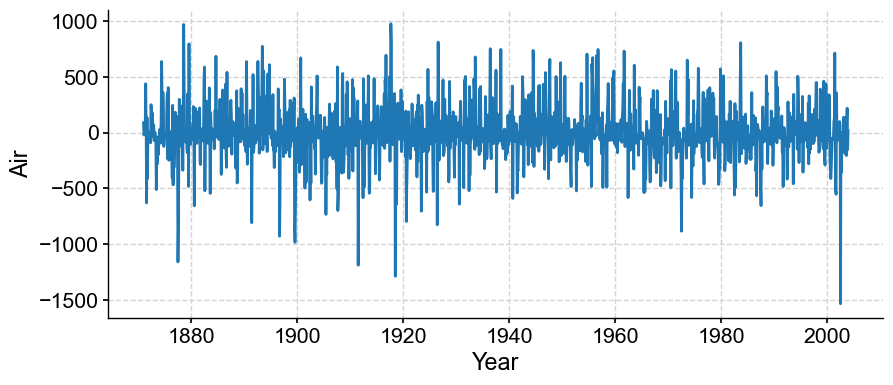

In [62]:
air_series.plot()

We will pick our own values for `m` and `tau`.

In [64]:
#Selecting values for m and tau
air_m=30
air_tau = 5

These can be used to initialize a time delay embedded vector, the contents of which can easily be accessed and used for other purposes.

In [65]:
air_td = amt.TimeEmbeddedSeries(air_series,air_m,air_tau)

Taking a peek at the contents

In [67]:
air_td.embedded_data

array([[   87.3609 ,   437.85   ,    12.3383 , ...,   -75.2632 ,
          -16.0977 ,   -92.8346 ],
       [  -21.8346 ,    54.3684 ,   -52.9549 , ...,    65.8195 ,
          -40.7594 ,    38.4737 ],
       [   -5.52632,  -631.038  ,   -33.6391 , ...,   487.85   ,
          284.338  ,   -98.2632 ],
       ...,
       [   17.7368 ,  -484.098  ,   -35.8346 , ..., -1534.63   ,
          -69.9549 ,  -187.18   ],
       [  -26.1805 ,  -170.759  ,  -111.526  , ...,     1.96241,
          -63.6391 ,    38.8496 ],
       [  149.85   ,    45.3383 ,  -105.263  , ...,  -355.098  ,
          138.165  ,   134.368  ]])

Now we create a recurrence matrix from this object using an arbitrary value for epsilon (the radius that defines which points are considered "within the neighbourhood" of other points). The contents of this object are easily accessible. We can see what it contains with the `.__dict__.keys()` hack.

In [74]:
air_rm = air_td.create_recurrence_matrix(1500)
air_rm.__dict__.keys()

dict_keys(['matrix', 'time', 'epsilon', 'm', 'tau', 'series', 'value_name', 'value_unit', 'time_name', 'time_unit', 'label'])

Ammonyte contains convenient recurrence matrix plotting functions so that we can view our data product with ease.

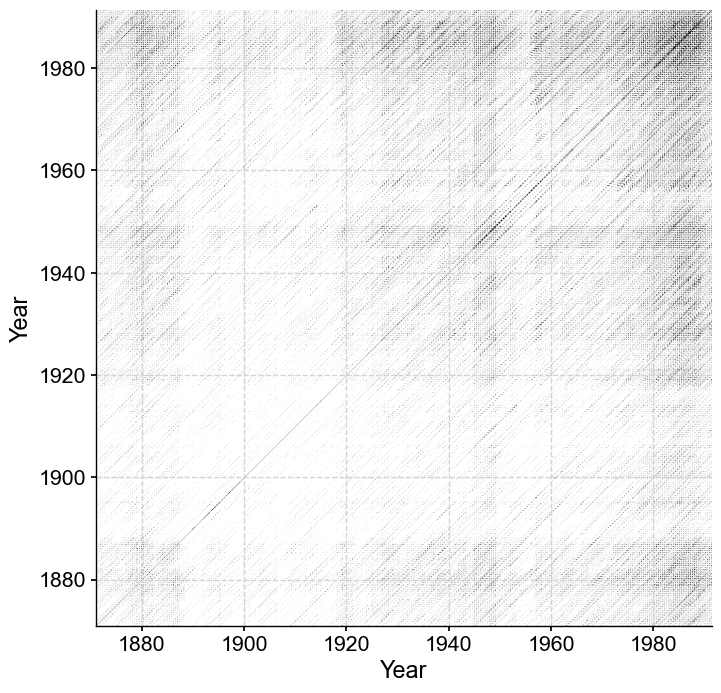

In [71]:
air_rm.plot()

What you do next is up to you! Take a peek at other notebooks within the Ammonyte Github repo to get a sense as to what other functionalities you can leverage on these objects, or apply your own analysis.

### Less hands on approach

Here we'll illustrate a few ways in which Ammonyte smoothes these first steps of RQA. If you aren't sure what value of `tau` to use, Ammonyte will calculate it for you using the first minimum of mutual information.

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot: xlabel='Year', ylabel='Nino Index'>)

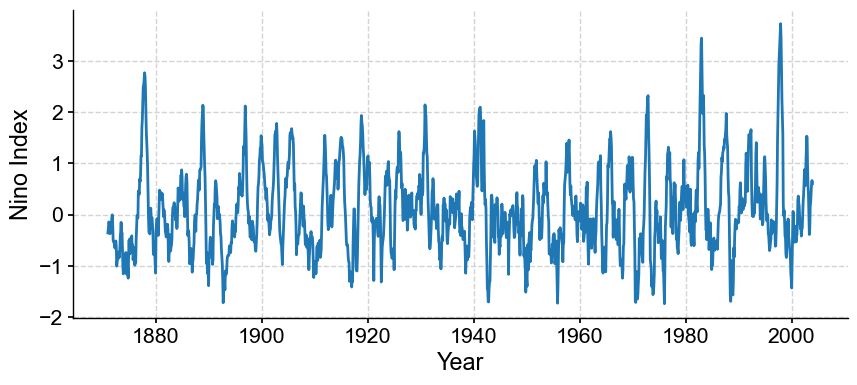

In [76]:
nino_series = amt.Series(time=nino_df['t'].values,
                        value=nino_df['nino'].values,
                        value_name='Nino Index',
                        time_name = 'Year',)

nino_series.plot()

In [78]:
m = 30

nino_td = amt.TimeEmbeddedSeries(nino_series,m)

nino_td.tau

11

As you can see, Ammonyte chooses a sensible value for tau for us. Ammonyte will also search for an epsilon value that fulfills a specific requirement for the recurrence rate. This is shown below.

In [86]:
nino_eps = nino_td.find_epsilon(eps=1,target_density=.05,tolerance=.01,amp=30)

Initial density is 0.0008
Initial density is not within the tolerance window, searching...
Epsilon: 2.4748, Density: 0.0036.
Epsilon: 3.8679, Density: 0.0090.
Epsilon: 4.6054, Density: 0.0402.
Epsilon: 4.6054, Density: 0.0402.


The resulting recurrence matrix is conveniently stored to avoid unnecessary re-computation.

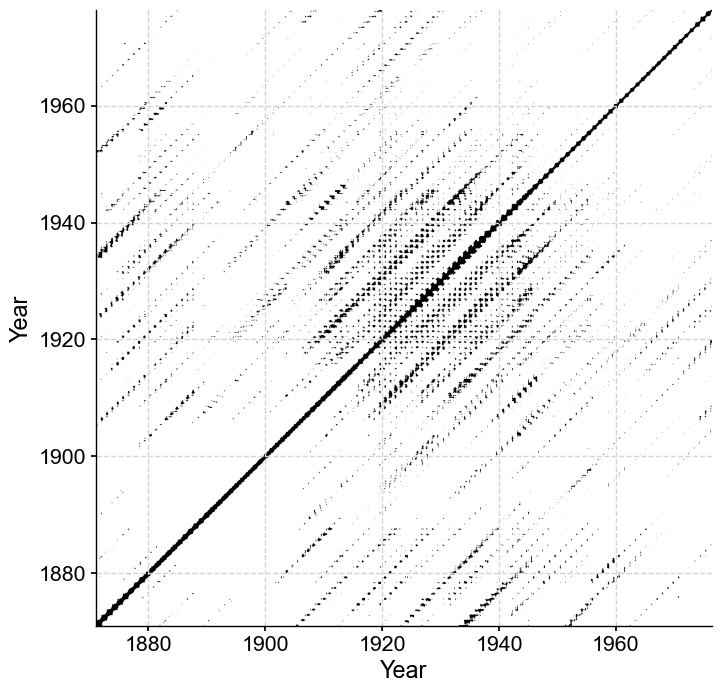

In [91]:
nino_rm = nino_eps['Output']

nino_rm.plot()

Note the difference in epsilon values. You have to get close with your initial guess in order for Ammonyte to do the rest for you, but at least you don't have to enter in a million guesses to get the right one. Other ease of life features are in the works!